# Import Packages

In [3]:
pip install "numpy<2" --force-reinstall

  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.32.0 which is incompatible.


In [5]:
%pip install numpy==1.26.4

In [7]:
!pip install "numpy<2" --force-reinstall

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.32.0 which is incompatible.



  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


In [9]:
pip install numpy==1.26.4

In [11]:
import numpy as np
print(np.__version__)


1.26.4


In [13]:
pip install seaborn==0.12.2 matplotlib==3.8.0 scikit-learn==1.3.2 tensorflow==2.15 opencv-python==4.9.0.80


  Using cached seaborn-0.12.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.8.0-cp312-cp312-win_amd64.whl.metadata (5.9 kB)
  Using cached scikit_learn-1.3.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.15 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.15


In [14]:
import os
import numpy as np
import cv2
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
from sklearn.metrics import confusion_matrix

print("✅ All imports working fine!")


✅ All imports working fine!


In [15]:
class_names = ["Apple___Apple_scab","Apple___Black_rot","Apple___Cedar_apple_rust","Apple___Healthy",
               "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
               "Corn_(maize)___Northern_Leaf_Blight","Grape___Black_rot"]
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)
print(class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___Healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot']


In [19]:
from tqdm import tqdm

# Loading the Data
We have to write a load_data function that load the images and the labels from the folder.

In [22]:
def load_data():

    datasets = [r'C:\Users\laksh\Downloads\plantleaf disease-loyola\plantleaf disease-loyola\Train', r'C:\Users\laksh\Downloads\plantleaf disease-loyola\plantleaf disease-loyola\test']

    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [26]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:\Users\laksh\Downloads\plantleaf disease-loyola\plantleaf disease-loyola\Train


100%|██████████| 15/15 [00:00<00:00, 214.73it/s]


Loading C:\Users\laksh\Downloads\plantleaf disease-loyola\plantleaf disease-loyola\test


100%|██████████| 15/15 [00:00<00:00, 667.46it/s]


In [28]:
from sklearn.utils import shuffle
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)


In [30]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 106
Number of testing examples: 106
Each image is of size: (150, 150)


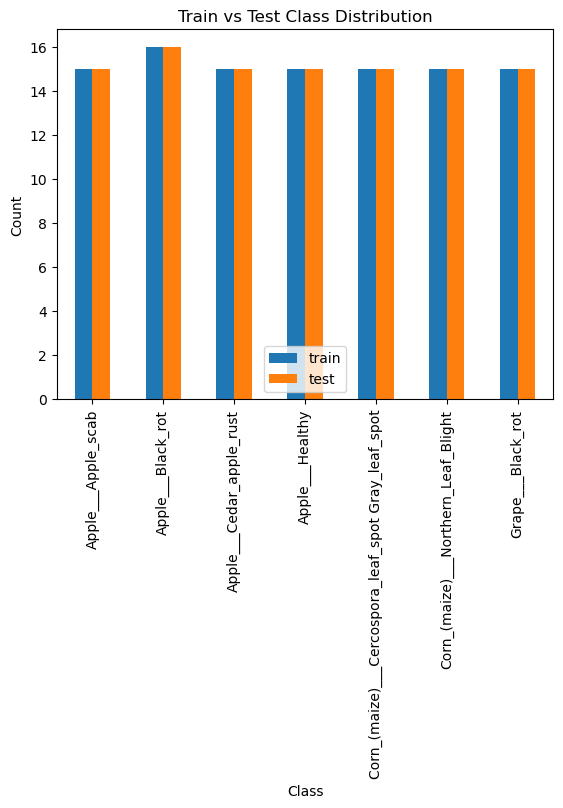

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get class counts
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)

# Create DataFrame and plot
df = pd.DataFrame(
    {'train': train_counts, 'test': test_counts},
    index=class_names
)

df.plot.bar()
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Train vs Test Class Distribution")
plt.show()


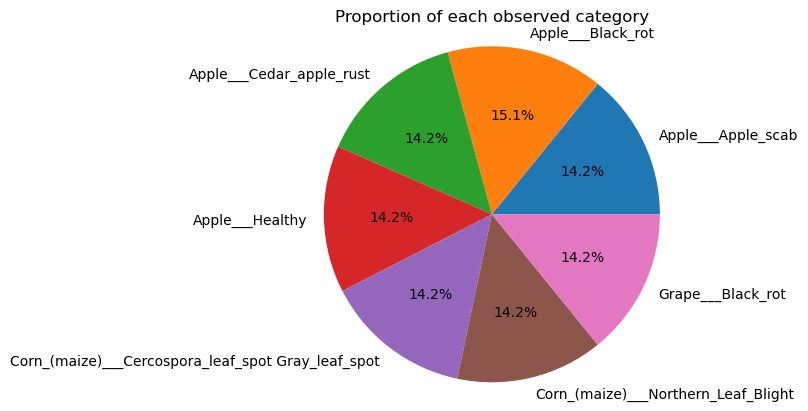

In [41]:
import matplotlib.pyplot as plt

plt.pie(train_counts,
        explode=(0, 0, 0, 0,0,0,0,) ,
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

## Good practice: scale the data

In [44]:
train_images = train_images / 255.0
test_images = test_images / 255.0
print(train_images)
print(test_images)

[[[[0.45490196 0.39215687 0.39215687]
   [0.5764706  0.5137255  0.5137255 ]
   [0.5019608  0.4392157  0.4392157 ]
   ...
   [0.5411765  0.47058824 0.47058824]
   [0.43529412 0.36862746 0.36862746]
   [0.47058824 0.4        0.4       ]]

  [[0.5137255  0.4509804  0.4509804 ]
   [0.5686275  0.5058824  0.5058824 ]
   [0.3882353  0.32941177 0.32941177]
   ...
   [0.65882355 0.5882353  0.5882353 ]
   [0.5254902  0.45490196 0.45490196]
   [0.5176471  0.44705883 0.44705883]]

  [[0.5411765  0.47843137 0.47843137]
   [0.5254902  0.4627451  0.4627451 ]
   [0.53333336 0.47058824 0.47058824]
   ...
   [0.49411765 0.42352942 0.42352942]
   [0.53333336 0.4627451  0.4627451 ]
   [0.47843137 0.40392157 0.40392157]]

  ...

  [[0.8117647  0.77254903 0.76862746]
   [0.77254903 0.73333335 0.7294118 ]
   [0.76862746 0.7254902  0.72156864]
   ...
   [0.63529414 0.5803922  0.5803922 ]
   [0.627451   0.57254905 0.57254905]
   [0.62352943 0.5686275  0.5686275 ]]

  [[0.81960785 0.78039217 0.7764706 ]
   [0.8

## Visualize the data
We can display a random image from the training set.

In [47]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """

    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

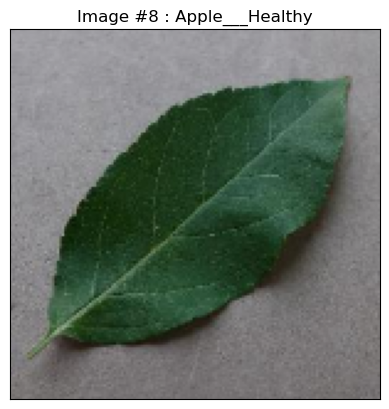

In [49]:
import matplotlib.pyplot as plt
display_random_image(class_names, train_images, train_labels)

In [51]:
import matplotlib.pyplot as plt

def display_examples(class_names, images, labels):
    """
    Display 25 images from the images array with its corresponding labels
    """
    fig, axes = plt.subplots(5, 5, figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap=plt.cm.binary)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel(class_names[labels[i]])

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # adjust layout so title doesn't overlap
    plt.show()


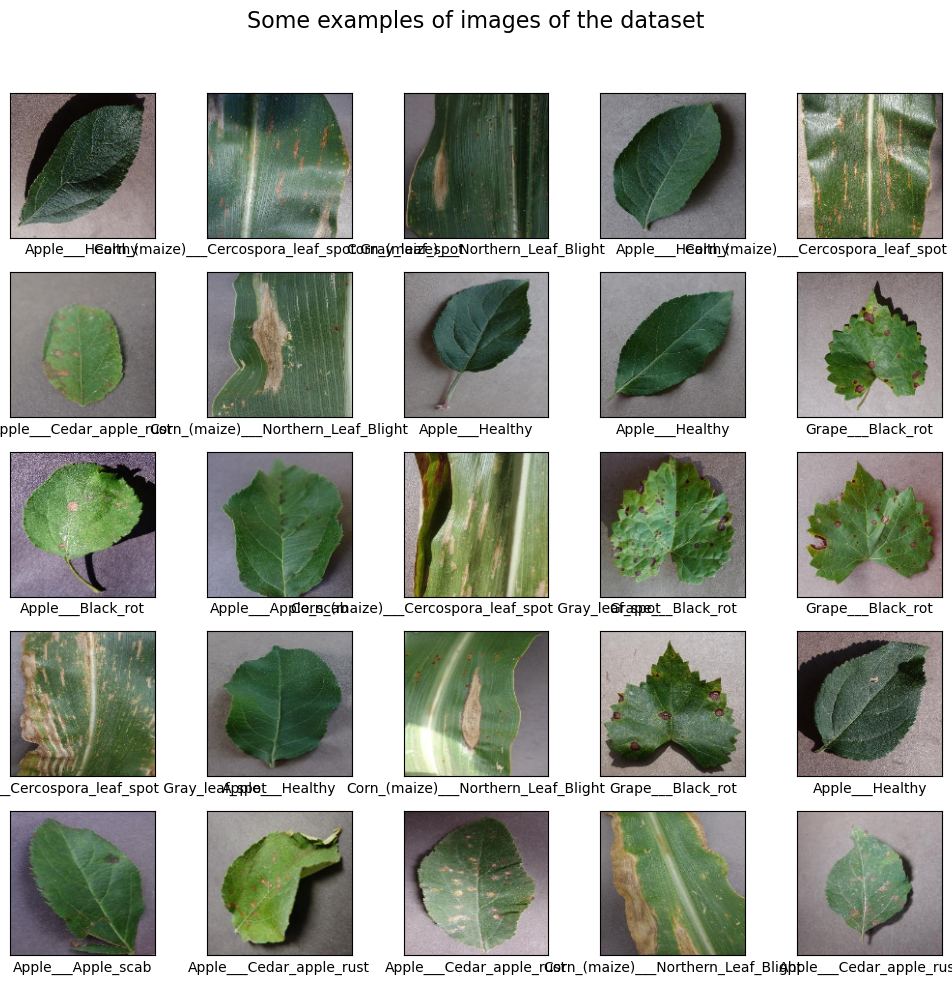

In [53]:
display_examples(class_names, train_images, train_labels)

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(7, activation=tf.nn.softmax)
])

C:\Users\laksh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [59]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.1310 - loss: 1.9542 - val_accuracy: 0.1364 - val_loss: 3.6055
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1548 - loss: 2.8925 - val_accuracy: 0.1364 - val_loss: 3.5425
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1429 - loss: 3.0912 - val_accuracy: 0.1818 - val_loss: 2.6679
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2143 - loss: 2.4613 - val_accuracy: 0.0909 - val_loss: 2.3149
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1548 - loss: 2.1487 - val_accuracy: 0.0909 - val_loss: 2.0549
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1667 - loss: 1.9266 - val_accuracy: 0.1364 - val_loss: 1.8963
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step - accuracy: 0.2857 - loss: 1.7906 - val_accuracy: 0.4545 - val_loss: 1.8214
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step - accuracy: 0.6190 - loss: 1.6863 - val_accuracy: 0.2727 - val_loss: 1.8183
Epoch 9/20

In [61]:
test_loss = model.evaluate(test_images, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9245 - loss: 0.3489


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


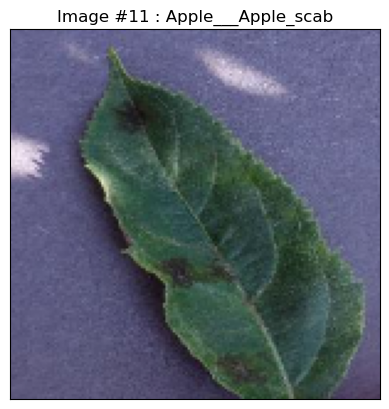

In [63]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability


index = np.random.randint(test_images.shape[0])
plt.figure()
plt.imshow(test_images[index])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

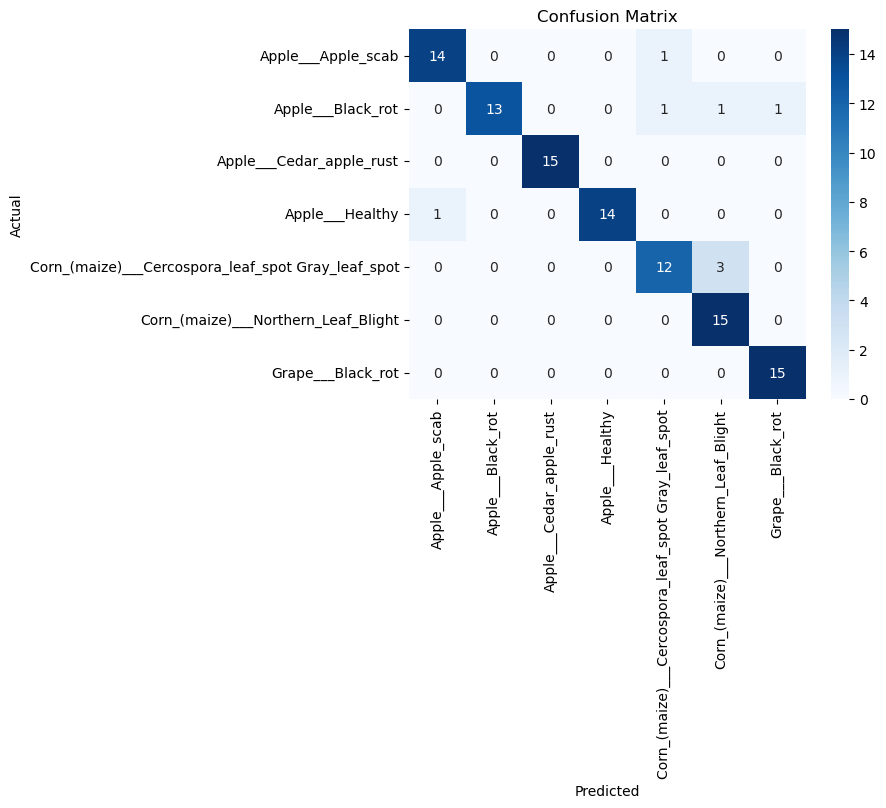

In [67]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
CM = confusion_matrix(test_labels, pred_labels)

# Plot heatmap
ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels=class_names,
           yticklabels=class_names,
           ax=ax,
           cmap="Blues", fmt="d")   # fmt="d" ensures integers
ax.set_title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [69]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

# Assuming CM is your confusion matrix, and you have class_names defined

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(test_labels, pred_labels, average='weighted')
overall_recall = recall_score(test_labels, pred_labels, average='weighted')
overall_f1 = f1_score(test_labels, pred_labels, average='weighted')

# Calculate custom accuracy
custom_accuracy = accuracy_score(test_labels, pred_labels)

print(f'Precision: {overall_precision}')
print(f'Recall: {overall_recall}')
print(f'F1 Score: {overall_f1}')
print(f'Custom Accuracy: {custom_accuracy}')

Precision: 0.9317146049084977
Recall: 0.9245283018867925
F1 Score: 0.9244604005683957
Custom Accuracy: 0.9245283018867925


In [71]:
# Generate and print classification report
print("\nClassification Report:")
print(classification_report(test_labels, pred_labels, target_names=class_names))


Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.93      0.93      0.93        15
                                 Apple___Black_rot       1.00      0.81      0.90        16
                          Apple___Cedar_apple_rust       1.00      1.00      1.00        15
                                   Apple___Healthy       1.00      0.93      0.97        15
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.86      0.80      0.83        15
               Corn_(maize)___Northern_Leaf_Blight       0.79      1.00      0.88        15
                                 Grape___Black_rot       0.94      1.00      0.97        15

                                          accuracy                           0.92       106
                                         macro avg       0.93      0.93      0.92       106
                                      weighted avg    

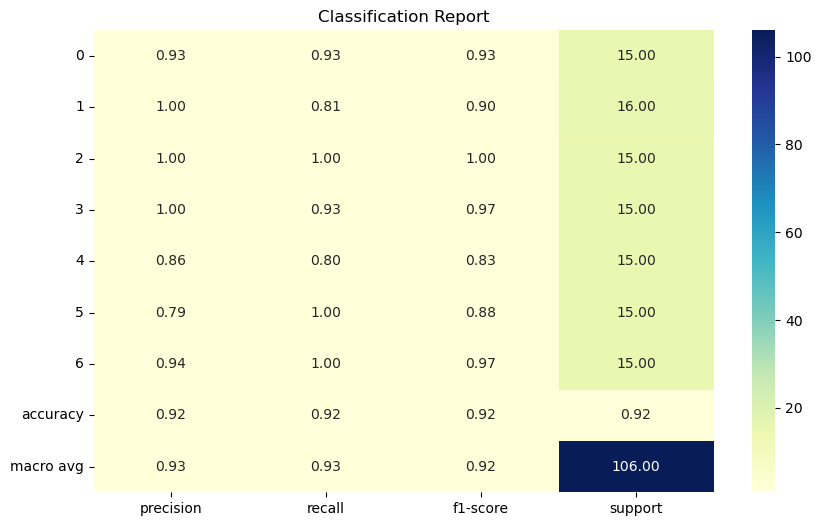

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Assuming test_labels and pred_labels are available

# Generate classification report
report = classification_report(test_labels, pred_labels, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Classification Report')
plt.show()

In [75]:
model.save_weights("model_vgg.weights.h5")
print("Saved model to disk")

Saved model to disk


In [77]:
model_json=model.to_json()
with open("model_vgg.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import tensorflow as tf
from flask import Flask, render_template, request, send_from_directory

app = Flask(__name__)


UPLOAD_FOLDER = "uploads"
STATIC_FOLDER = "static"
json_file = open('model_vgg.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
#cnn_model = model_from_json(loaded_model_json)
# load weights into new model
#cnn_model.load_weights("model_vgg.h5")
# Load model

IMAGE_SIZE = 150

# Preprocess an image
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
    image /= 255.0  # normalize to [0,1] range

    return image


# Read the image from path and preprocess
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)

    return preprocess_image(image)


# Predict & classify image
# Predict & classify image
def classify(model, image_path):
    preprocessed_image = load_and_preprocess_image(image_path)
    preprocessed_image = tf.reshape(preprocessed_image, (1, IMAGE_SIZE, IMAGE_SIZE, 3))

    prob = model.predict(preprocessed_image)[0]
    print(prob)

    # Get the index of the maximum probability
    predicted_label_index = np.argmax(prob)

    # Mapping index to label name
    label_names = ["Apple___Apple_scab","Apple___Black_rot","Apple___Cedar_apple_rust","Apple___Healthy",
               "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
               "Corn_(maize)___Northern_Leaf_Blight","Grape___Black_rot"]
    # Replace with your actual label names

    label = label_names[predicted_label_index]

    classified_prob = prob[predicted_label_index]

    return label, classified_prob



# home page
@app.route("/")
def home():
    return render_template("home.html")


@app.route("/classify", methods=["POST", "GET"])
def upload_file():

    if request.method == "GET":
        return render_template("home.html")

    else:
        file = request.files["image"]
        upload_image_path = os.path.join(UPLOAD_FOLDER, file.filename)
        print(upload_image_path)
        file.save(upload_image_path)

        label, prob = classify(model, upload_image_path)

        prob = round((prob * 100), 2)

    return render_template(
        "classify.html", image_file_name=file.filename, label=label, prob=prob
    )


@app.route("/classify/<filename>")
def send_file(filename):
    return send_from_directory(UPLOAD_FOLDER, filename)


if __name__ == "__main__":

    app.run()



 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
